<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5126 non-null   int64  
 1   V1      5126 non-null   float64
 2   V2      5126 non-null   float64
 3   V3      5126 non-null   float64
 4   V4      5126 non-null   float64
 5   V5      5126 non-null   float64
 6   V6      5126 non-null   float64
 7   V7      5126 non-null   float64
 8   V8      5126 non-null   float64
 9   V9      5126 non-null   float64
 10  V10     5126 non-null   float64
 11  V11     5126 non-null   float64
 12  V12     5126 non-null   float64
 13  V13     5126 non-null   float64
 14  V14     5126 non-null   float64
 15  V15     5126 non-null   float64
 16  V16     5126 non-null   float64
 17  V17     5126 non-null   float64
 18  V18     5126 non-null   float64
 19  V19     5126 non-null   float64
 20  V20     5126 non-null   float64
 21  V21     5126 non-null   float64
 22  

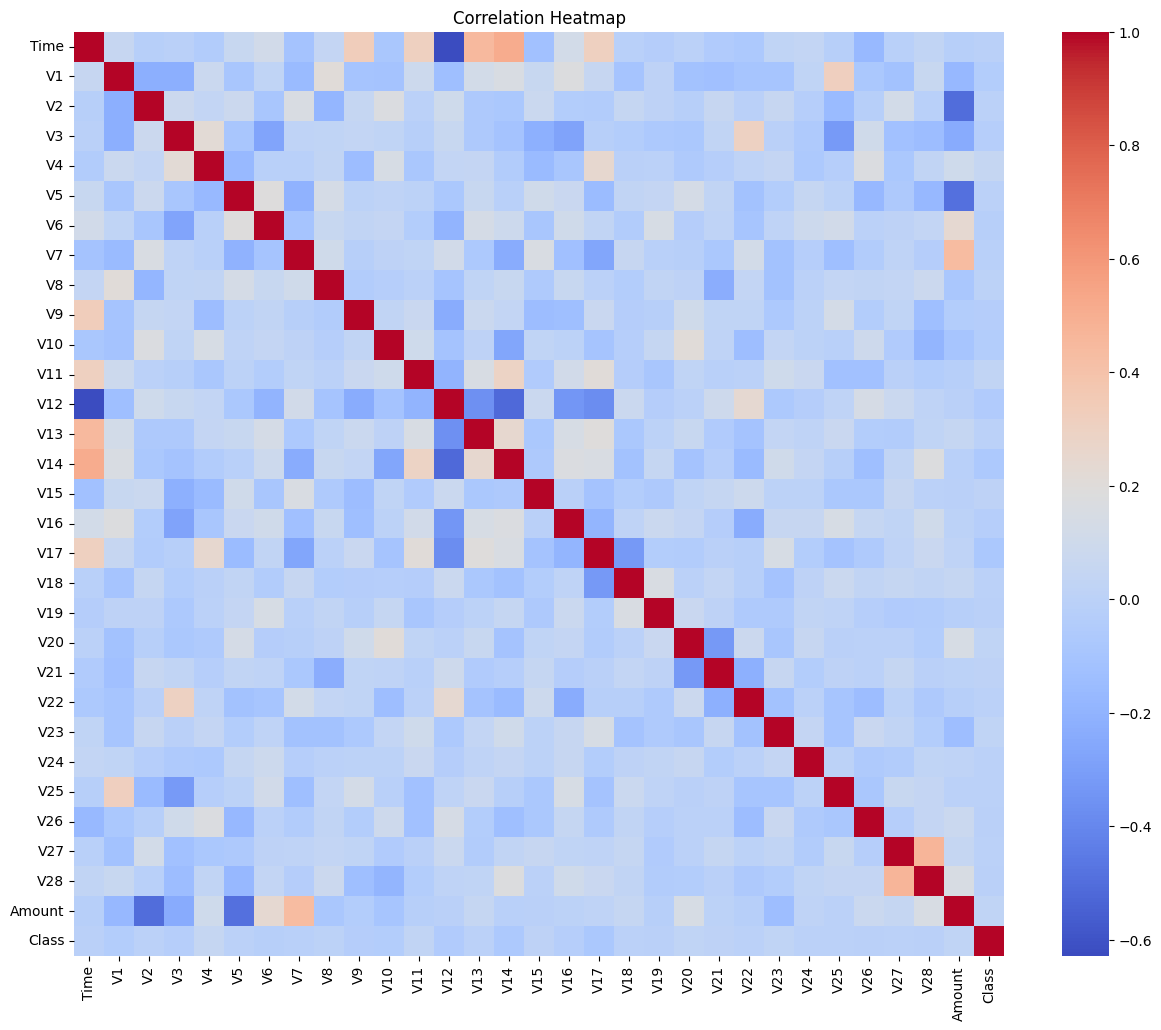

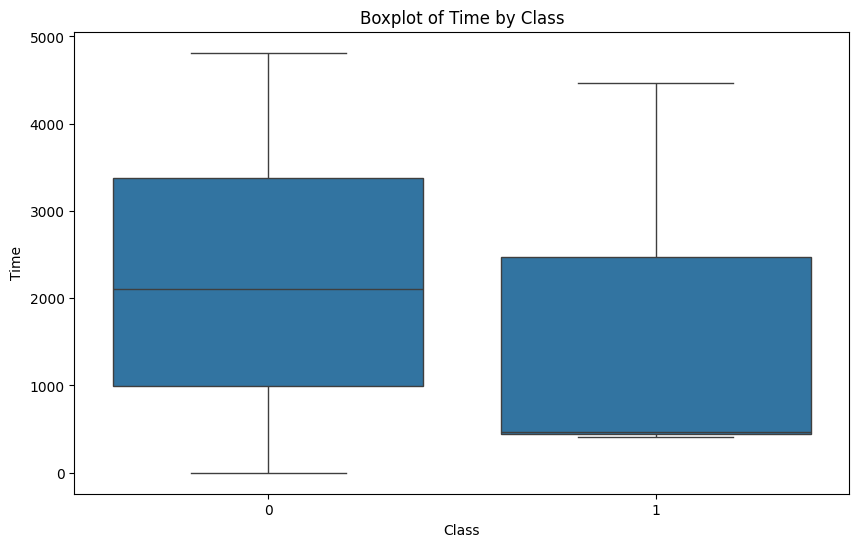

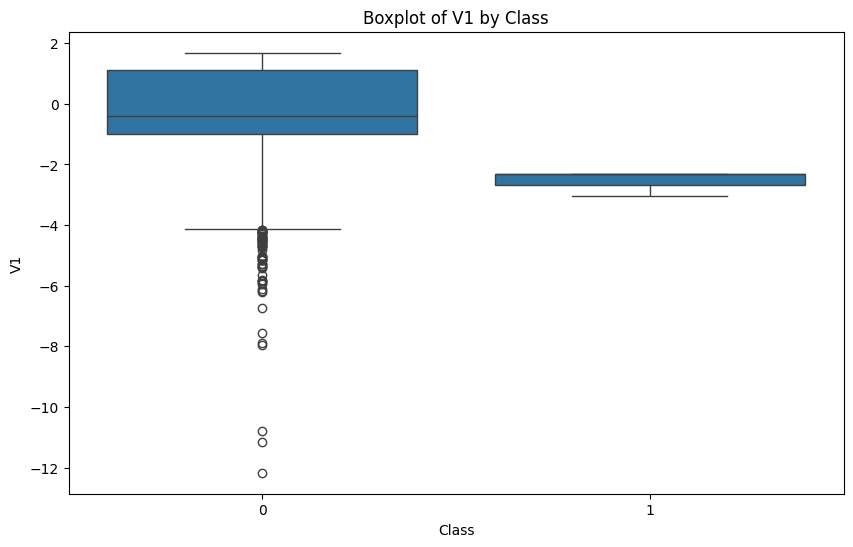

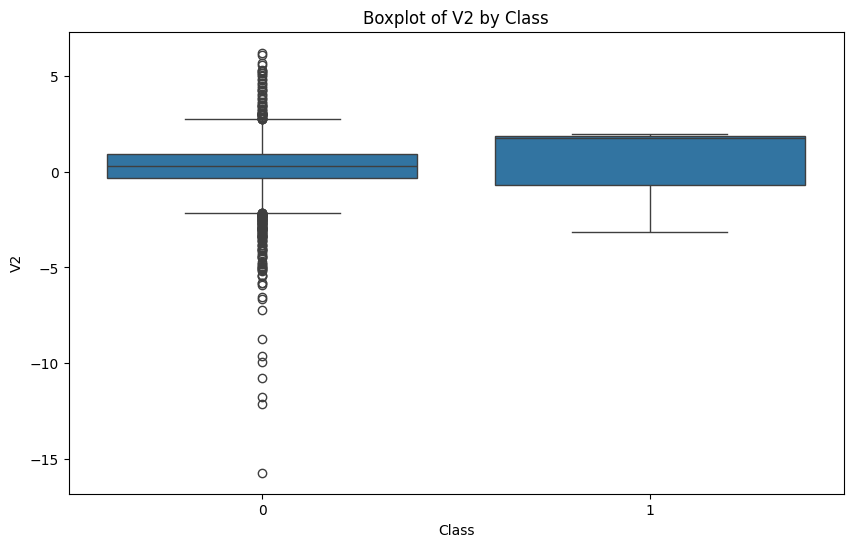

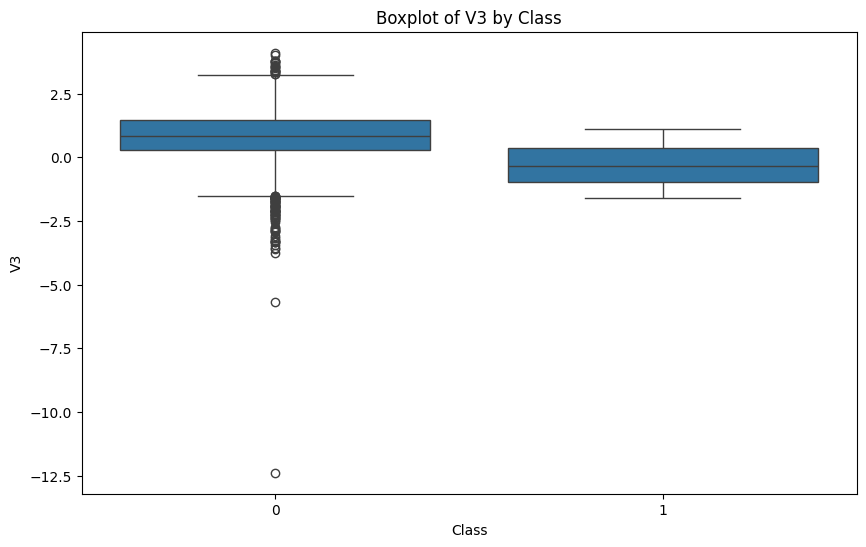

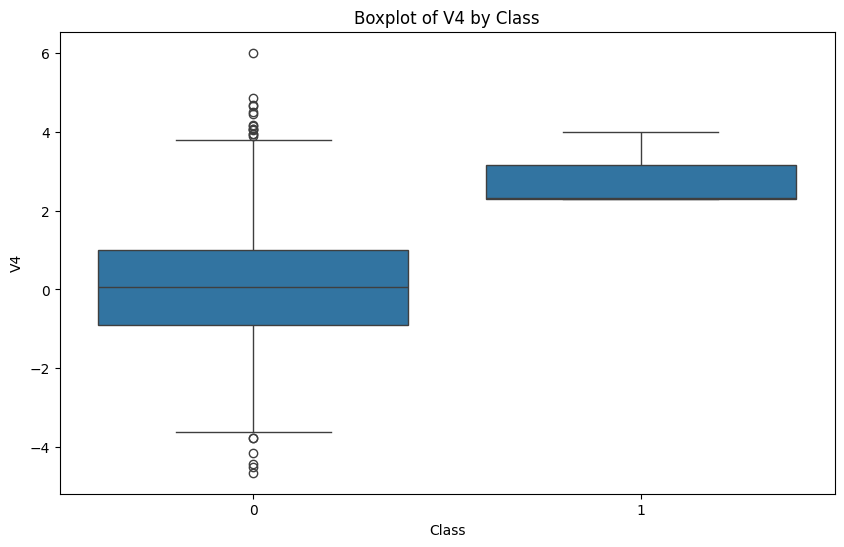

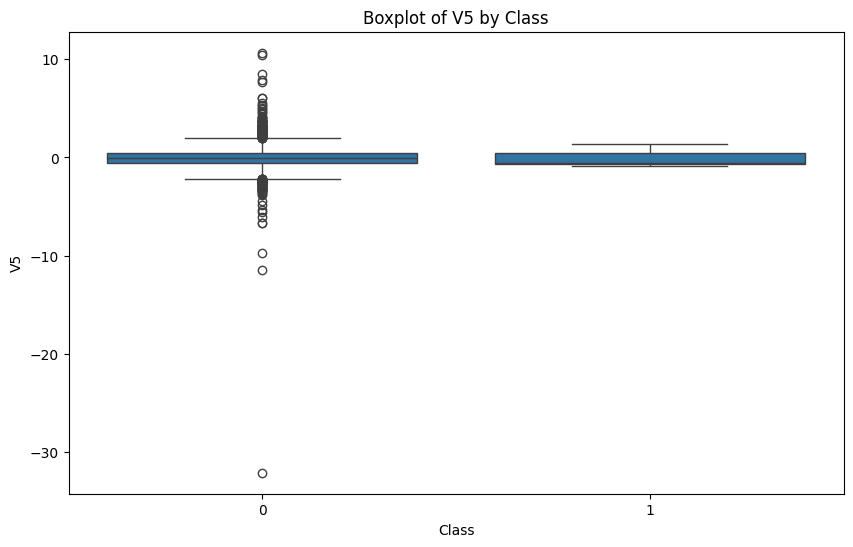

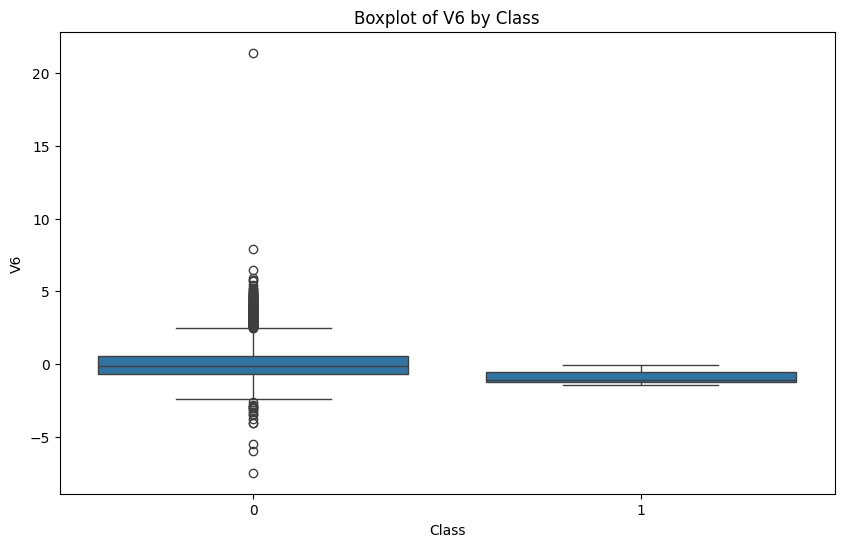

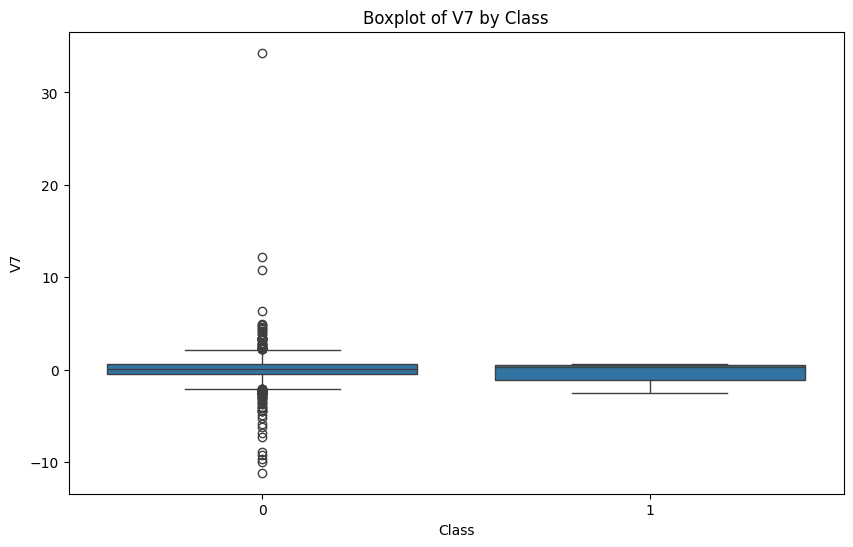

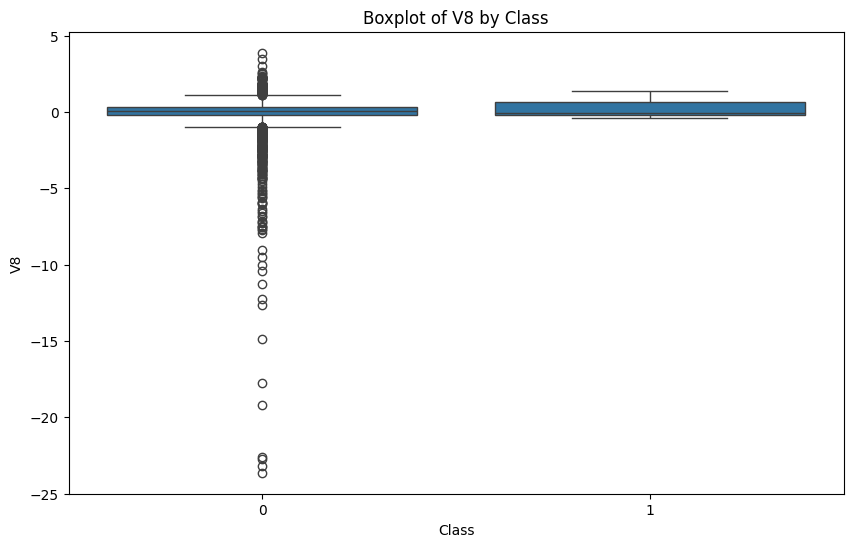

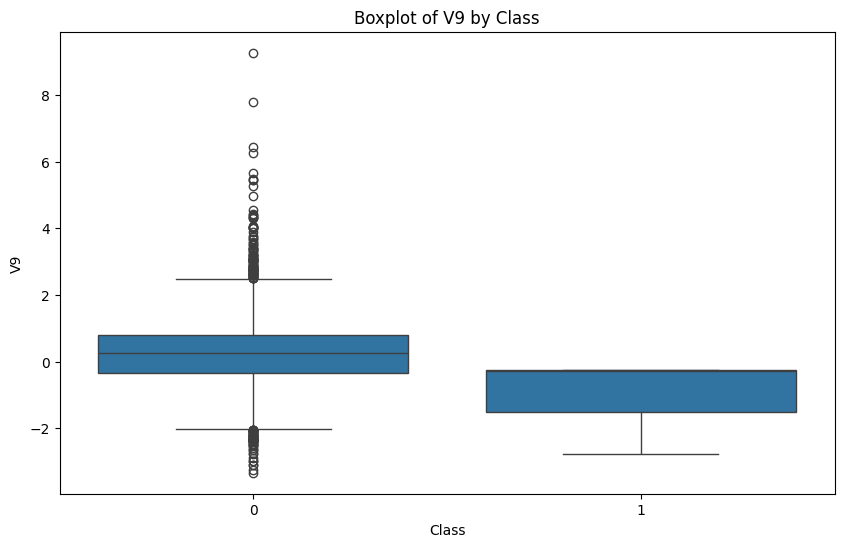

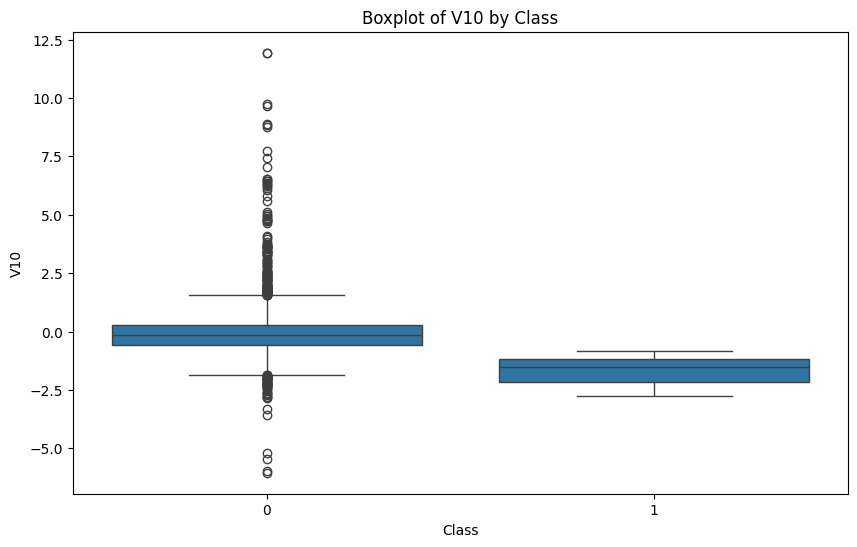

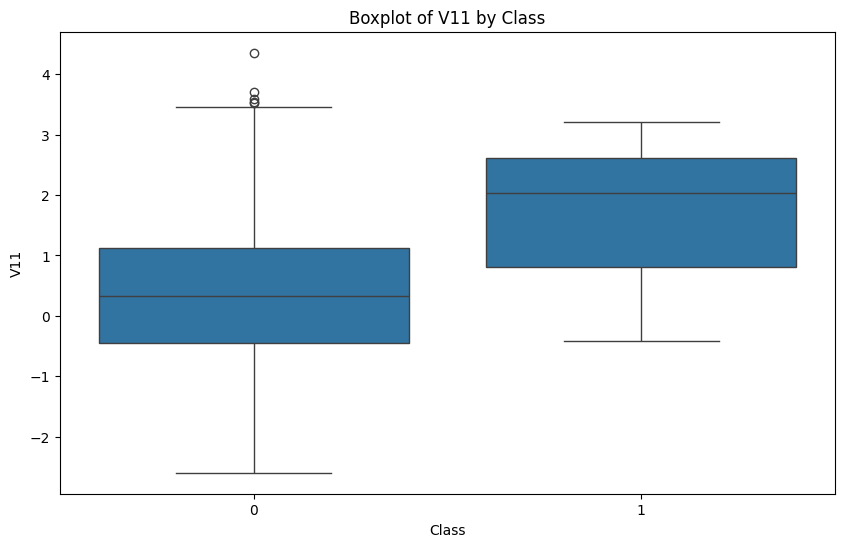

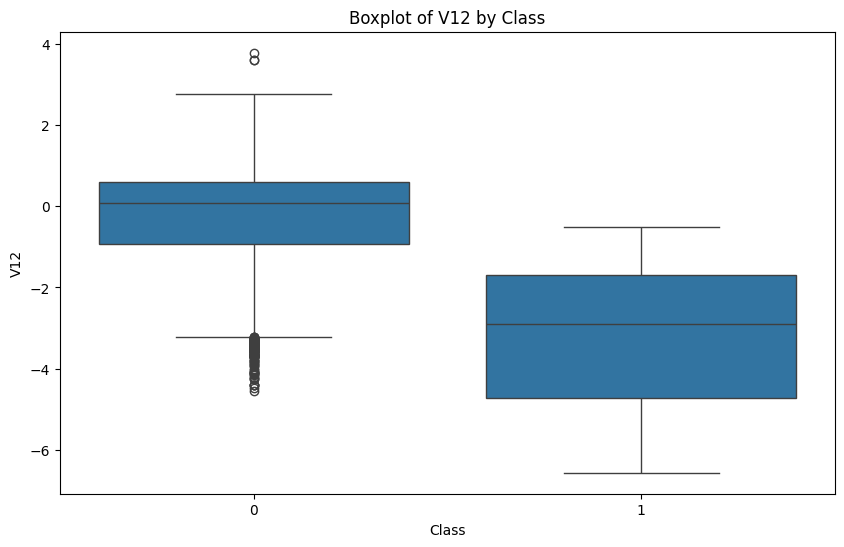

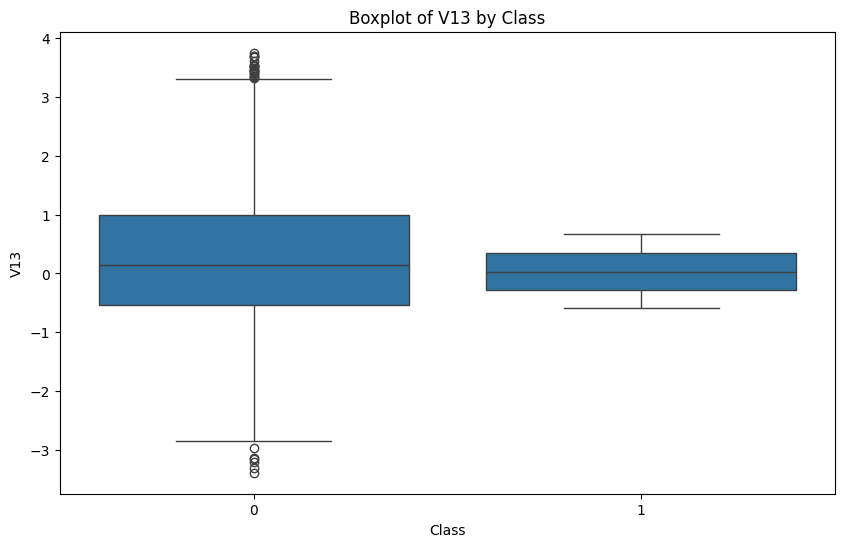

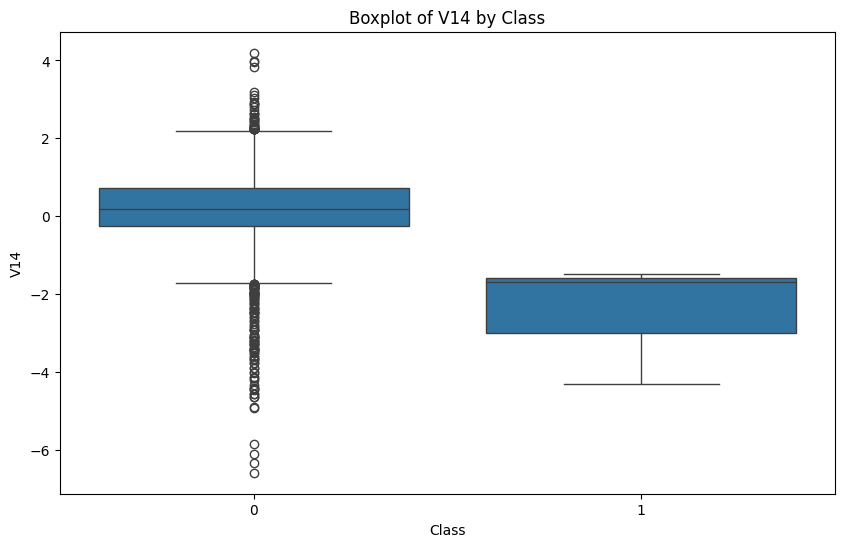

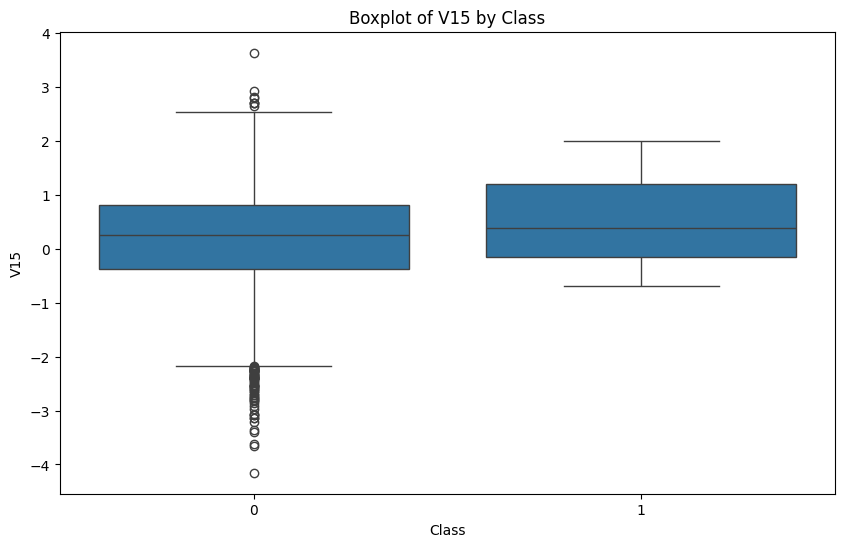

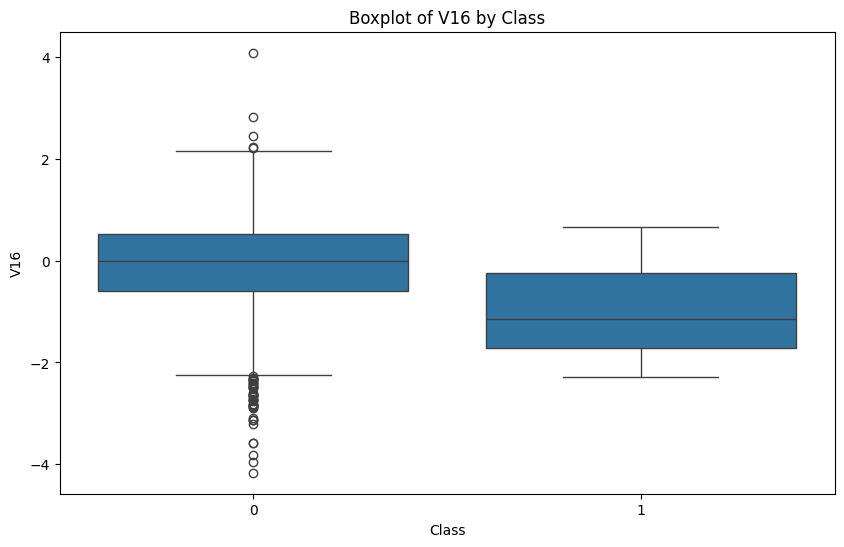

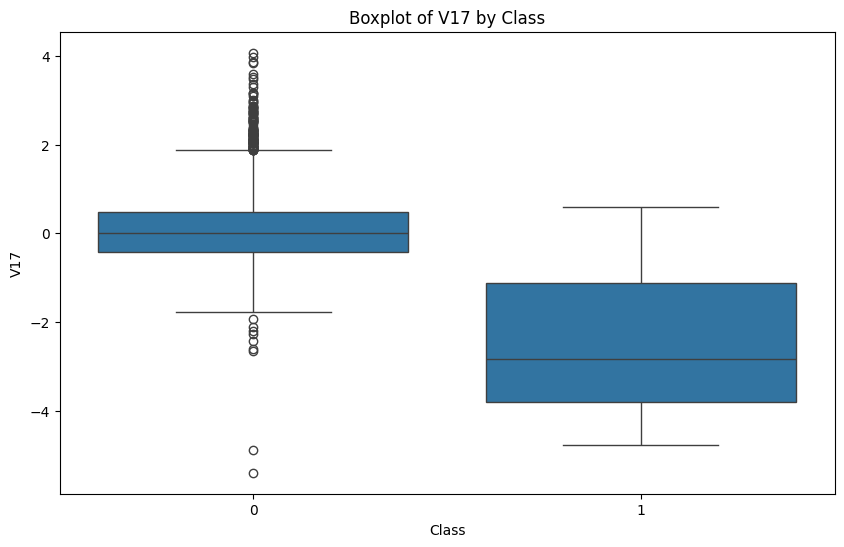

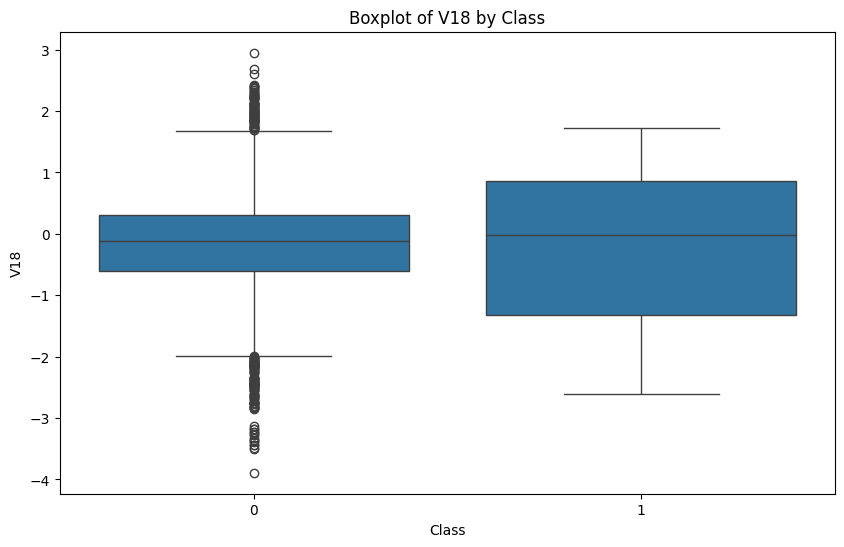

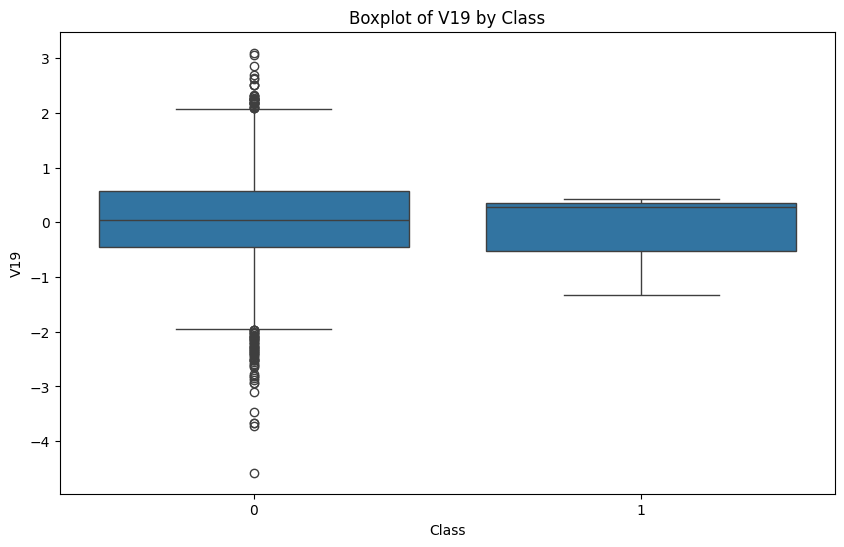

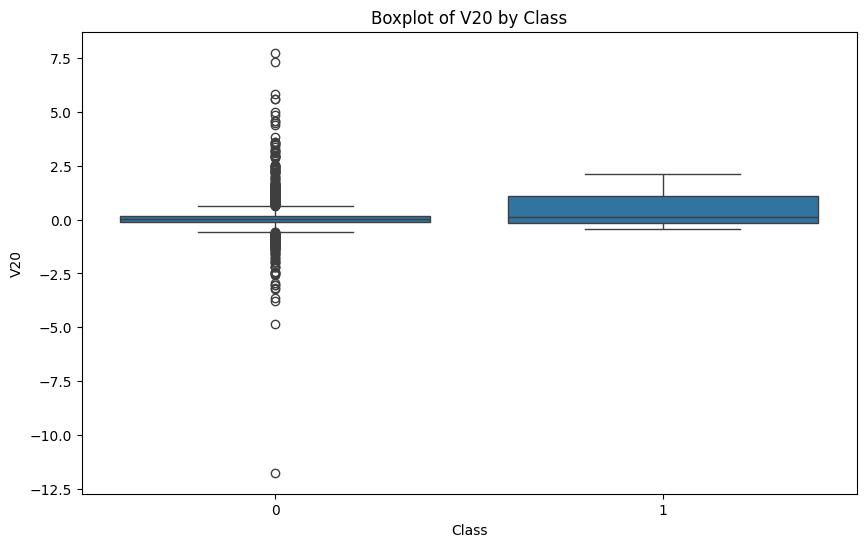

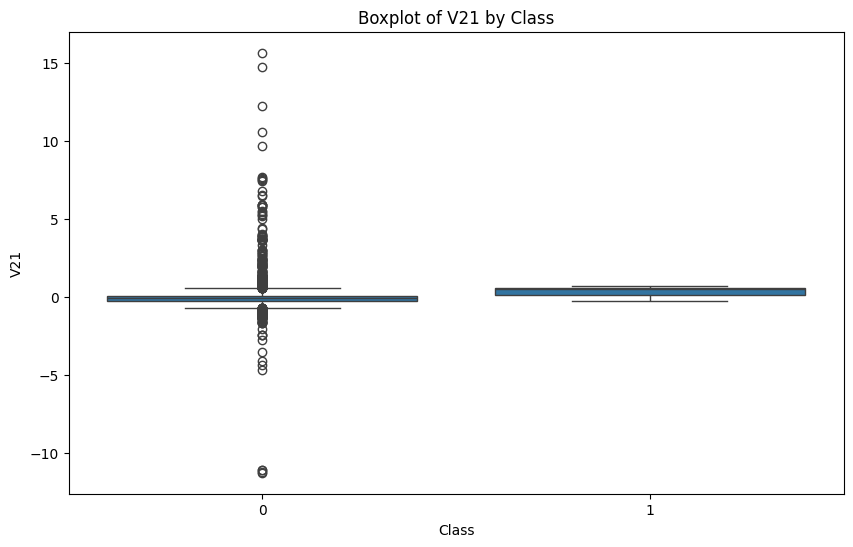

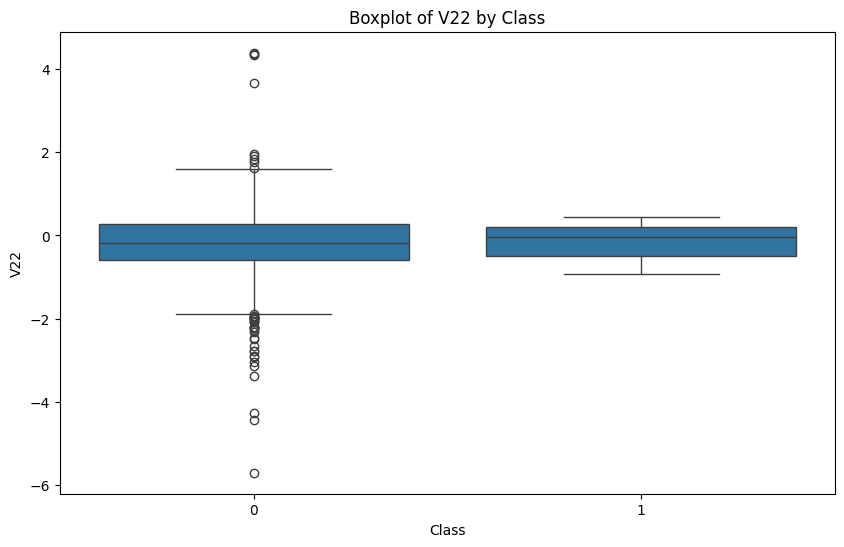

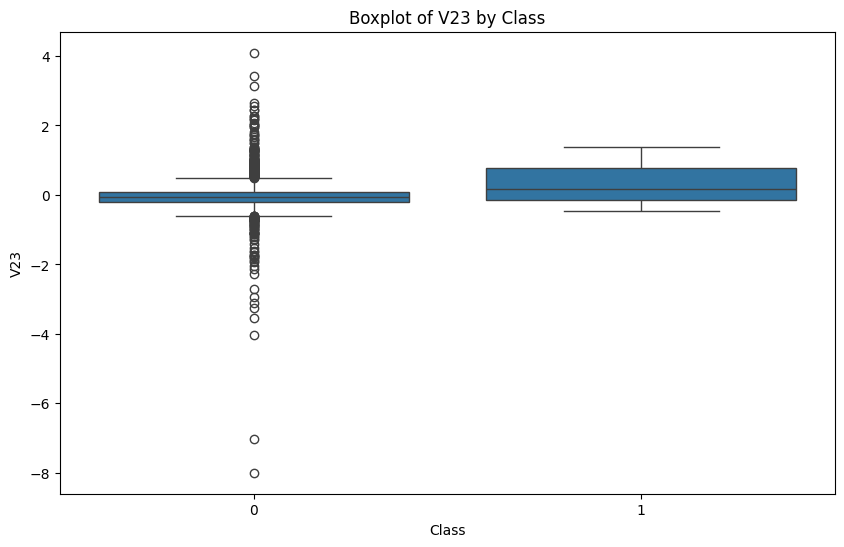

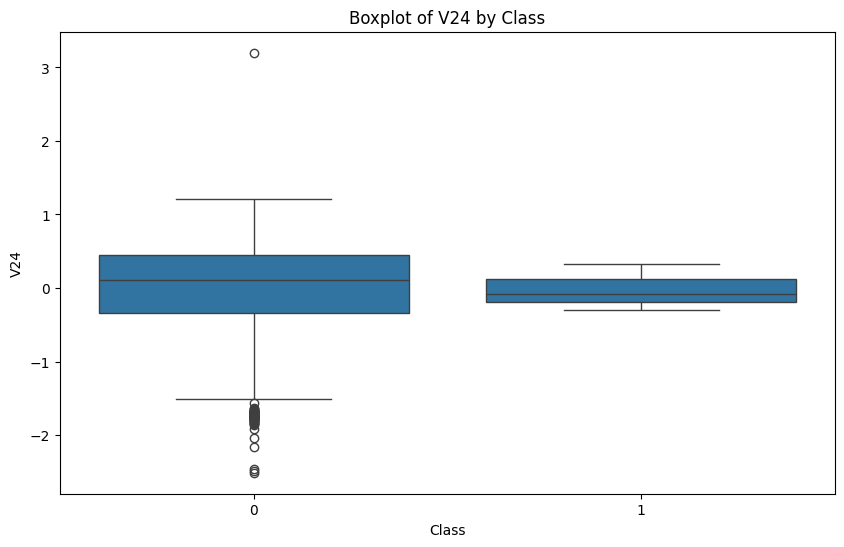

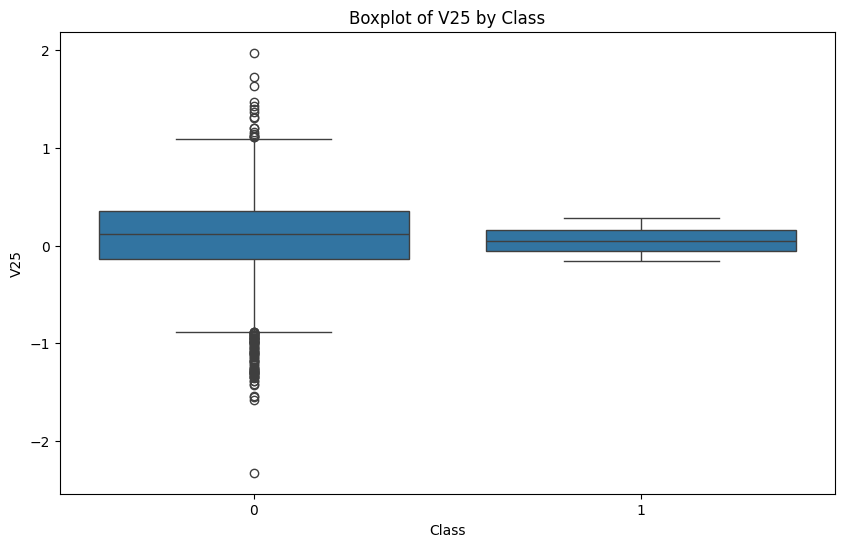

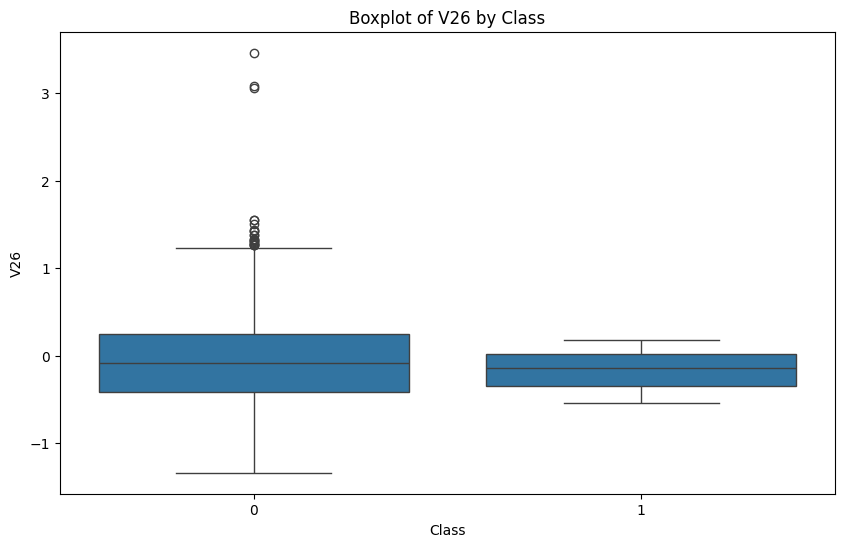

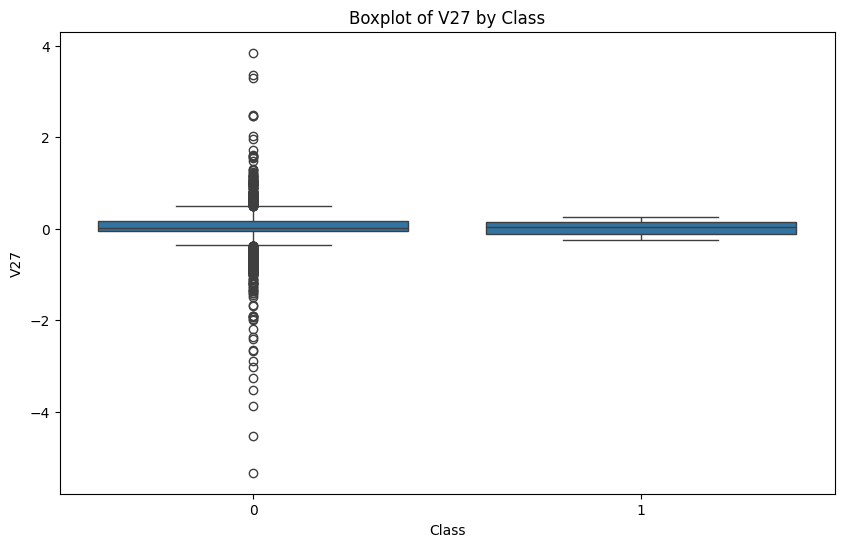

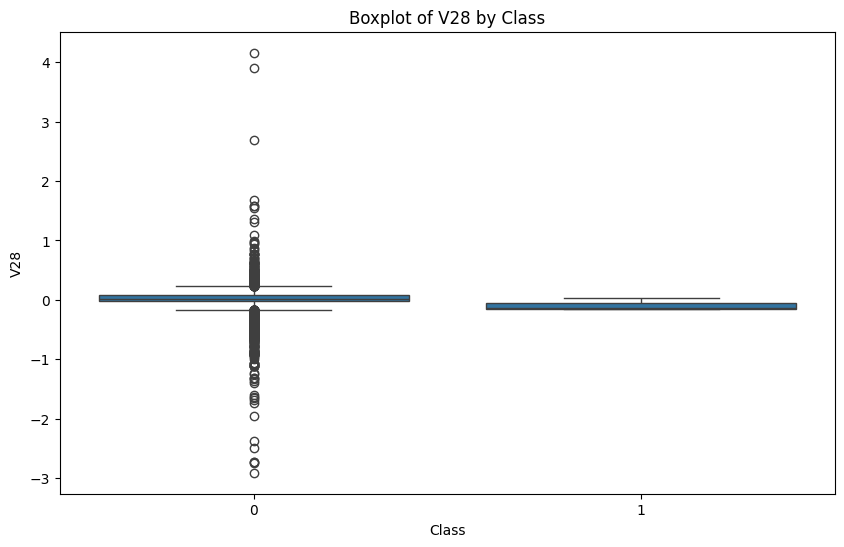

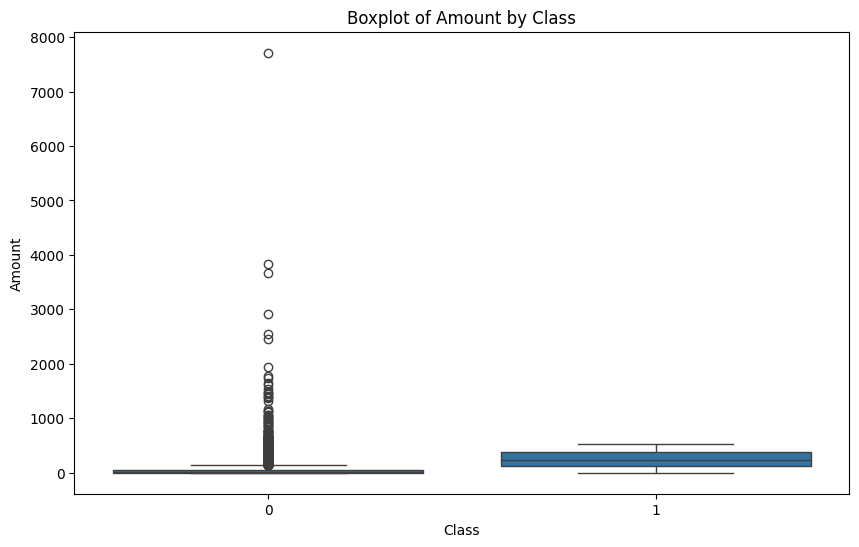

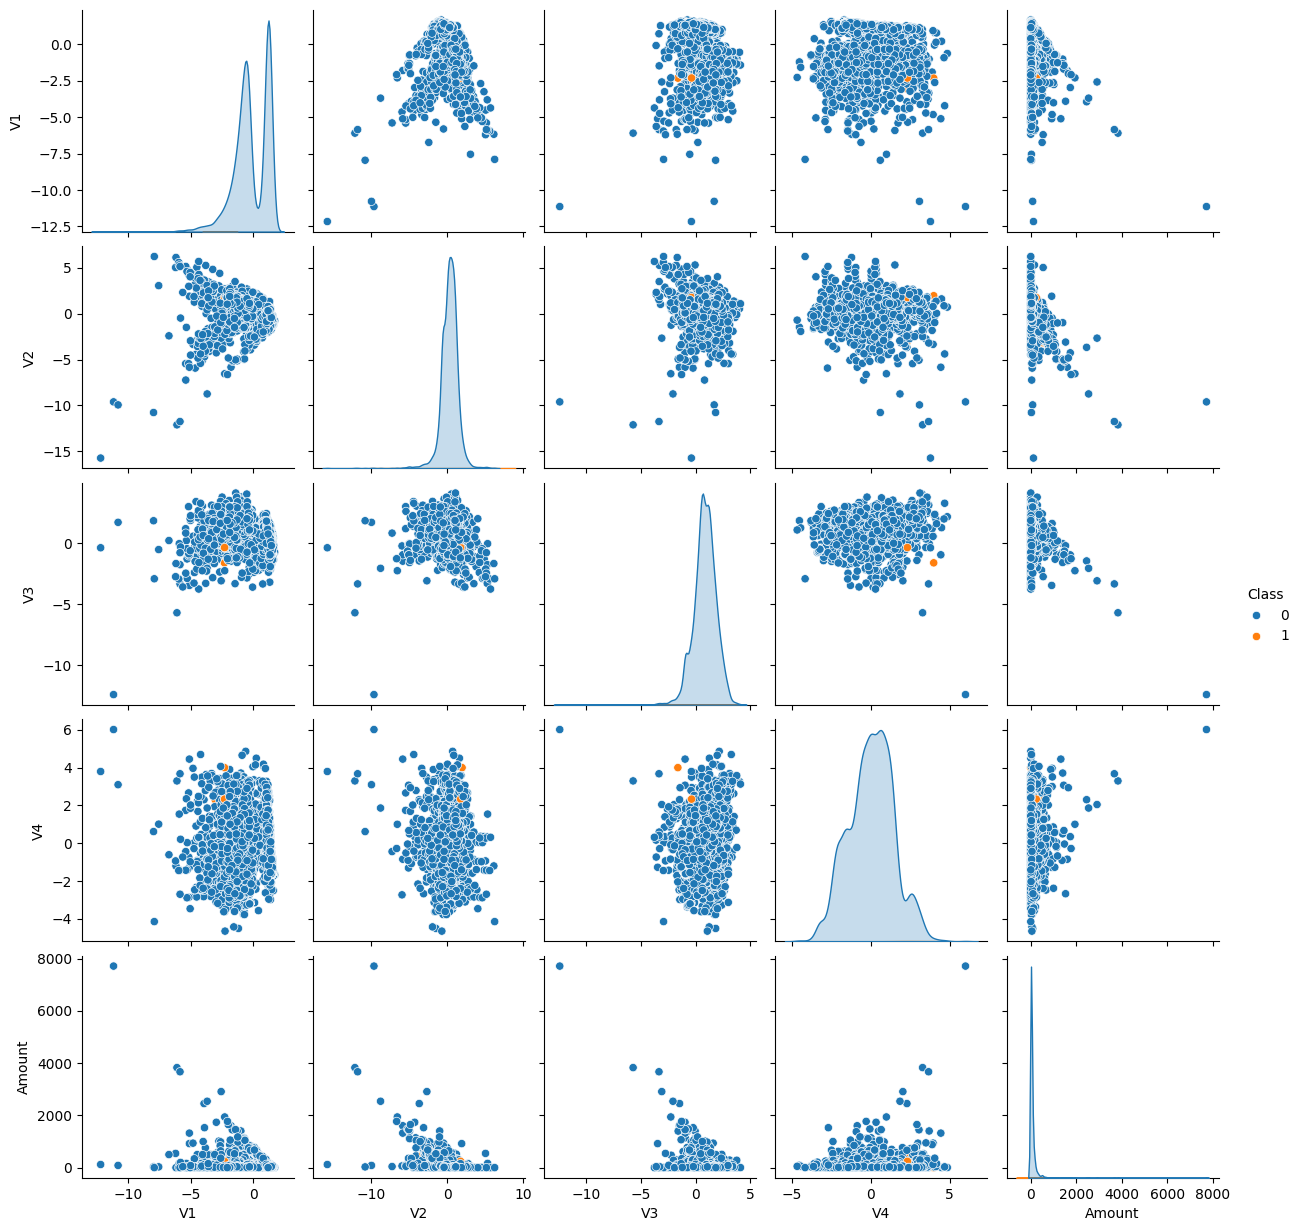

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
dataset_path = 'cc.csv'
df = pd.read_csv(dataset_path)

# Inspect the structure and basic statistics of the dataset
print(df.info())
print(df.describe())

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Box plots for each feature by class (0: normal, 1: fraudulent)
for column in df.columns[:-1]:  # Skipping the 'Class' column
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=column, data=df)
    plt.title(f'Boxplot of {column} by Class')
    plt.show()

# Pairplot (select specific features if the dataset is large)
selected_features = ['V1', 'V2', 'V3', 'V4', 'Amount', 'Class']
sns.pairplot(df[selected_features], hue='Class')
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5126 entries, 0 to 5125
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5126 non-null   int64  
 1   V1      5126 non-null   float64
 2   V2      5126 non-null   float64
 3   V3      5126 non-null   float64
 4   V4      5126 non-null   float64
 5   V5      5126 non-null   float64
 6   V6      5126 non-null   float64
 7   V7      5126 non-null   float64
 8   V8      5126 non-null   float64
 9   V9      5126 non-null   float64
 10  V10     5126 non-null   float64
 11  V11     5126 non-null   float64
 12  V12     5126 non-null   float64
 13  V13     5126 non-null   float64
 14  V14     5126 non-null   float64
 15  V15     5126 non-null   float64
 16  V16     5126 non-null   float64
 17  V17     5126 non-null   float64
 18  V18     5126 non-null   float64
 19  V19     5126 non-null   float64
 20  V20     5126 non-null   float64
 21  V21     5126 non-null   float64
 22  

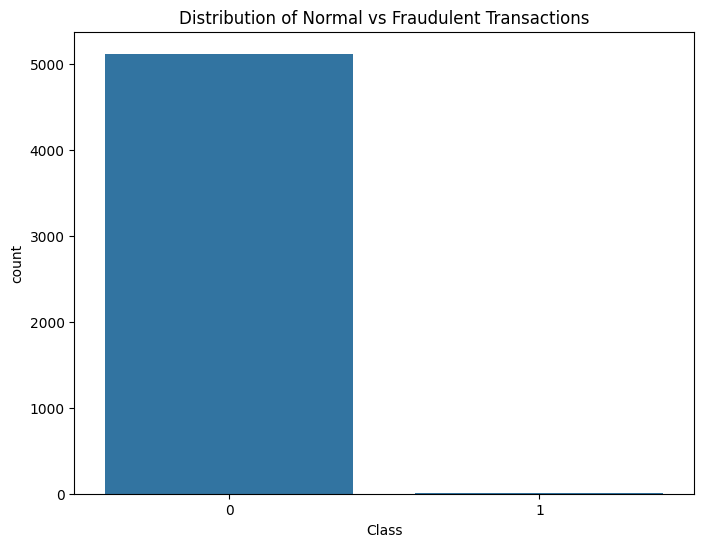

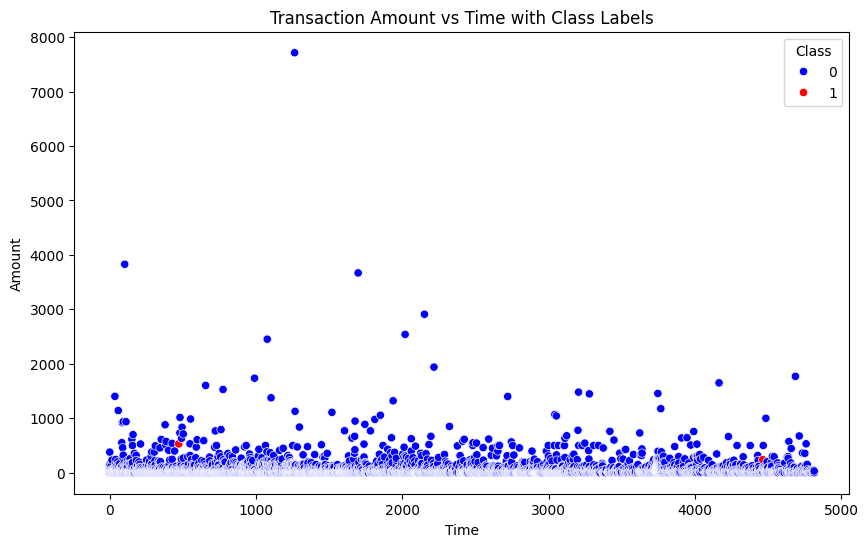

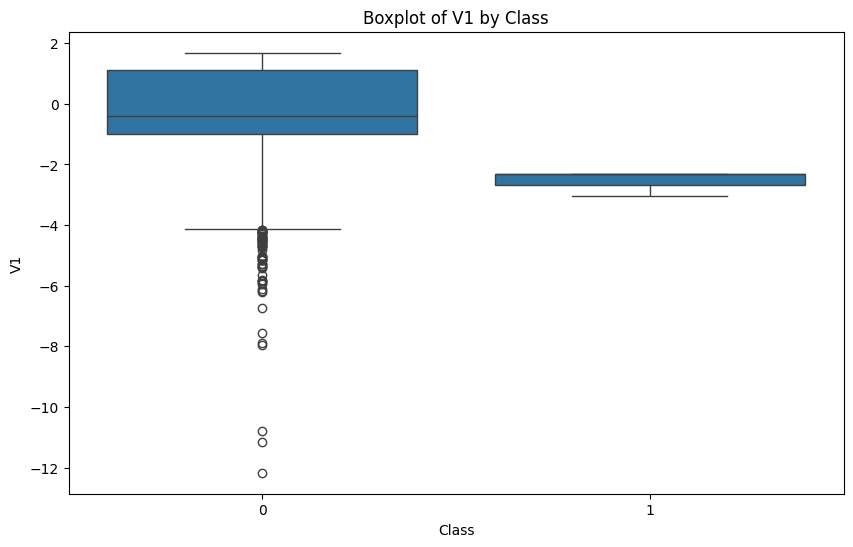

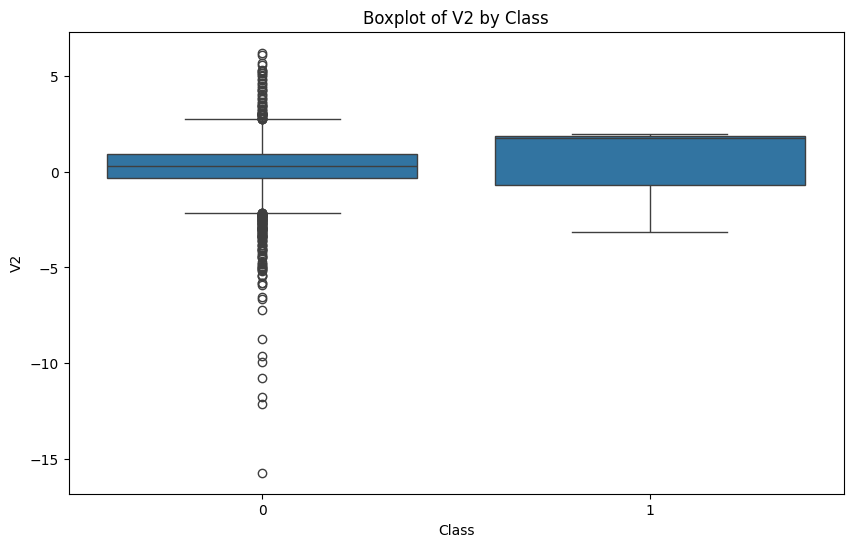

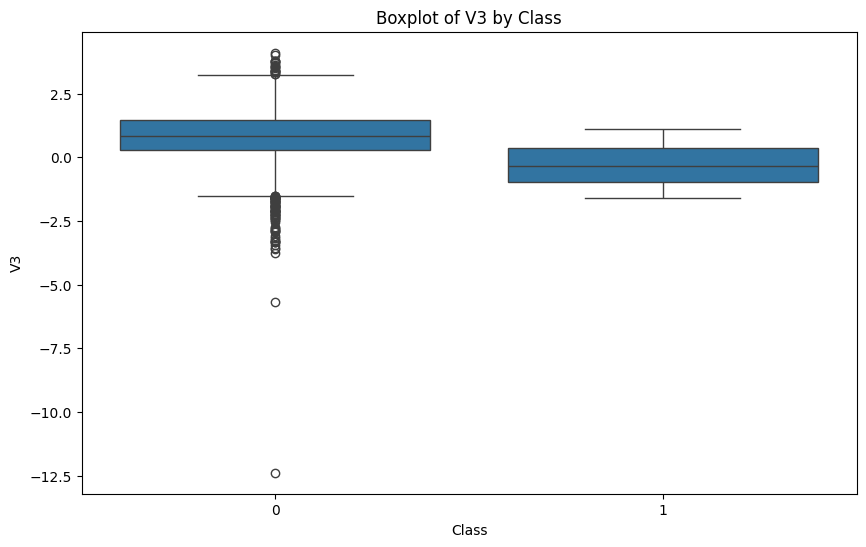

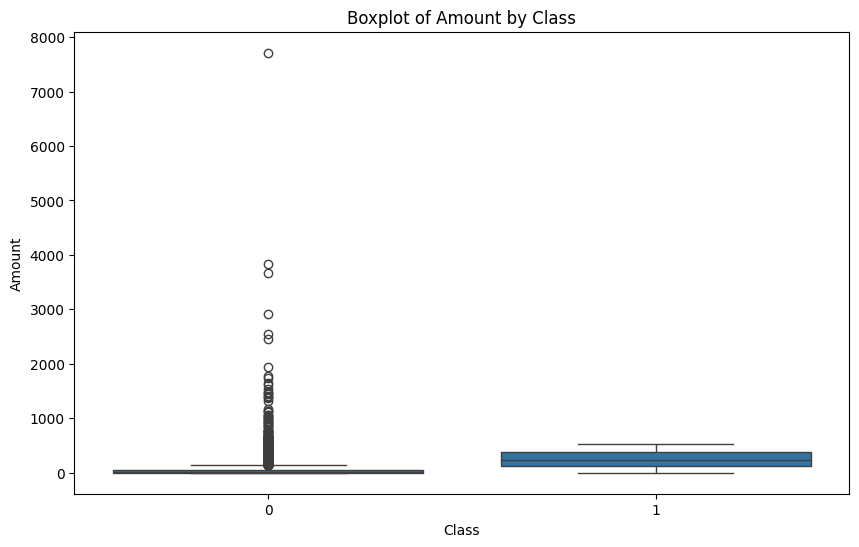

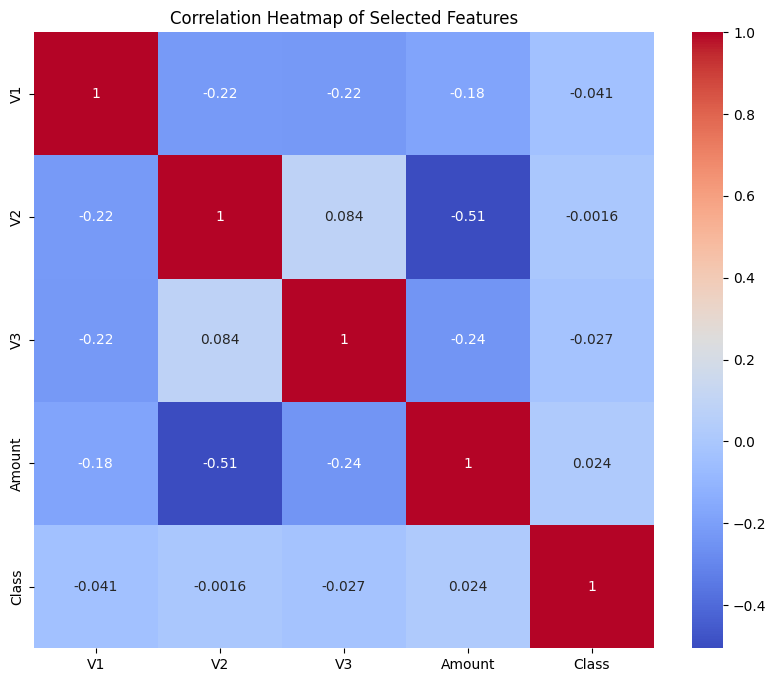

In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
dataset_path = 'cc.csv'
df = pd.read_csv(dataset_path)

# Inspect basic statistics and class distribution
print(df.info())
print(df.describe())
print(f"Class distribution:\n{df['Class'].value_counts()}")

# Plot the distribution of the classes (0: Normal, 1: Fraudulent)
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Normal vs Fraudulent Transactions')
plt.show()

# Plot transaction amounts by time to identify patterns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, palette={0: 'blue', 1: 'red'})
plt.title('Transaction Amount vs Time with Class Labels')
plt.show()

# Compare feature distributions with box plots for fraudulent vs non-fraudulent transactions
selected_features = ['V1', 'V2', 'V3', 'Amount']
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Class')
    plt.show()

# Additional correlation heatmap focused on selected features
corr_features = selected_features + ['Class']
plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Selected Features')
plt.show()


In [11]:
import numpy as np

def random_mask(data, mask_prob=0.1):
    """ Apply random masking to data using a geometric distribution. """
    mask = np.random.geometric(mask_prob, size=data.shape) == 1
    return np.where(mask, 0, data)

# Example of applying random mask
X_masked = random_mask(df.drop('Class', axis=1).values)


In [12]:
from keras.models import Model
from keras.layers import Input, Dense, LayerNormalization

def transformer_encoder(inputs):
    """ A simple transformer encoder layer. """
    x = LayerNormalization()(inputs)
    x = Dense(64, activation='relu')(x)
    return LayerNormalization()(x)

def autoencoder(input_dim):
    inputs = Input(shape=(input_dim,))
    encoded = transformer_encoder(inputs)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    return Model(inputs, decoded)

# Create and compile the autoencoder
input_dim = X_masked.shape[1]
autoencoder_model = autoencoder(input_dim)
autoencoder_model.compile(optimizer='adam', loss='mse')


In [13]:
from keras.layers import Dense, Input
from keras.models import Model

def discriminator_model(input_dim):
    inputs = Input(shape=(input_dim,))
    x = Dense(64, activation='relu')(inputs)
    x = Dense(32, activation='relu')(x)
    x = Dense(1, activation='sigmoid')(x)
    return Model(inputs, x)

# Create the discriminator
discriminator = discriminator_model(input_dim)
discriminator.compile(optimizer='adam', loss='binary_crossentropy')


In [14]:
import tensorflow as tf

def contrastive_loss(y_true, y_pred):
    """ Custom contrastive loss for anomaly detection. """
    margin = 1
    square_pred = tf.square(y_pred)
    margin_square = tf.square(tf.maximum(margin - y_pred, 0))
    return tf.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)

# Integrate contrastive loss into the training of the discriminator
discriminator.compile(optimizer='adam', loss=contrastive_loss)


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split

# Prepare the data
X = df.drop(columns='Class').values
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply random mask to training data
X_train_masked = random_mask(X_train)

# Split training data for autoencoder and discriminator training
X_auto_train, X_disc_train = train_test_split(X_train_masked, test_size=0.5, random_state=42)

# Training the Autoencoder
print("Training Autoencoder...")
autoencoder_model.fit(X_auto_train, X_auto_train, epochs=10, batch_size=64, validation_split=0.1)

# Training the Discriminator
print("Training Discriminator...")
# Generate fake samples from the autoencoder
X_fake = autoencoder_model.predict(X_disc_train)
# Combine real and fake samples
X_combined = np.concatenate([X_disc_train, X_fake])
y_combined = np.concatenate([np.ones(X_disc_train.shape[0]), np.zeros(X_fake.shape[0])])  # Real=1, Fake=0
discriminator.fit(X_combined, y_combined, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate the model
# Use the autoencoder to predict the test set
X_test_pred = autoencoder_model.predict(X_test)
mse = np.mean(np.square(X_test - X_test_pred), axis=1)
mse_threshold = np.quantile(mse, 0.95)  # Set threshold as the 95th percentile of mse
print(f"MSE Threshold: {mse_threshold}")

# Detect anomalies in the test set
anomalies = mse > mse_threshold
anomalies_ratio = np.mean(anomalies)
print(f"Detected anomaly ratio in the test set: {anomalies_ratio:.2%}")

# Assuming ground truth is available
from sklearn.metrics import classification_report
print(classification_report(y_test, anomalies))


Training Autoencoder...
Epoch 1/10
29/29 [==============================] - 6s 56ms/step - loss: 200527.1562 - val_loss: 203380.2656
Epoch 2/10
29/29 [==============================] - 1s 17ms/step - loss: 200502.5156 - val_loss: 203377.7812
Epoch 3/10
29/29 [==============================] - 0s 16ms/step - loss: 200501.2969 - val_loss: 203377.2656
Epoch 4/10
29/29 [==============================] - 1s 19ms/step - loss: 200501.0625 - val_loss: 203377.0938
Epoch 5/10
29/29 [==============================] - 1s 22ms/step - loss: 200500.8594 - val_loss: 203377.0000
Epoch 6/10
29/29 [==============================] - 1s 20ms/step - loss: 200500.7969 - val_loss: 203376.9375
Epoch 7/10
29/29 [==============================] - 0s 13ms/step - loss: 200500.7500 - val_loss: 203376.8750
Epoch 8/10
29/29 [==============================] - 1s 18ms/step - loss: 200500.7500 - val_loss: 203376.8750
Epoch 9/10
29/29 [==============================] - 1s 23ms/step - loss: 200500.6875 - val_loss: 203376.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.decomposition import PCA

# Fit PCA and calculate reconstruction error
def detect_anomalies_pca(X, contamination=0.05):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    X_reconstructed = pca.inverse_transform(X_pca)
    error = np.mean(np.square(X - X_reconstructed), axis=1)
    threshold = np.percentile(error, 100 - contamination * 100)
    return error > threshold

# Detect anomalies using PCA
pca_anomalies = detect_anomalies_pca(X)


In [17]:
from sklearn.svm import OneClassSVM

# Fit and detect anomalies using One-Class SVM
def detect_anomalies_ocsvm(X_train, X_test, nu=0.05):
    oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=nu)
    oc_svm.fit(X_train)
    return oc_svm.predict(X_test) == -1

# Example application:
oc_svm_anomalies = detect_anomalies_ocsvm(X_train, X_test)


In [18]:
from sklearn.ensemble import IsolationForest

# Fit and detect anomalies using Isolation Forest
def detect_anomalies_iforest(X_train, X_test, contamination=0.05):
    iso_forest = IsolationForest(contamination=contamination, random_state=42)
    iso_forest.fit(X_train)
    return iso_forest.predict(X_test) == -1

# Example application:
iso_forest_anomalies = detect_anomalies_iforest(X_train, X_test)


In [19]:
from sklearn.neighbors import LocalOutlierFactor

# Detect anomalies using Local Outlier Factor
def detect_anomalies_lof(X, contamination=0.05):
    lof = LocalOutlierFactor(n_neighbors=20, contamination=contamination)
    return lof.fit_predict(X) == -1

# Example application:
lof_anomalies = detect_anomalies_lof(X)


In [20]:
from sklearn.cluster import DBSCAN

# Fit and detect anomalies using DBSCAN
def detect_anomalies_dbscan(X, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    return dbscan.fit_predict(X) == -1

# Example application:
dbscan_anomalies = detect_anomalies_dbscan(X)


In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the split object
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the split
for train_index, test_index in split.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


<ipython-input-30-cbc8f28b5a84>:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(results.keys(), rotation=45)


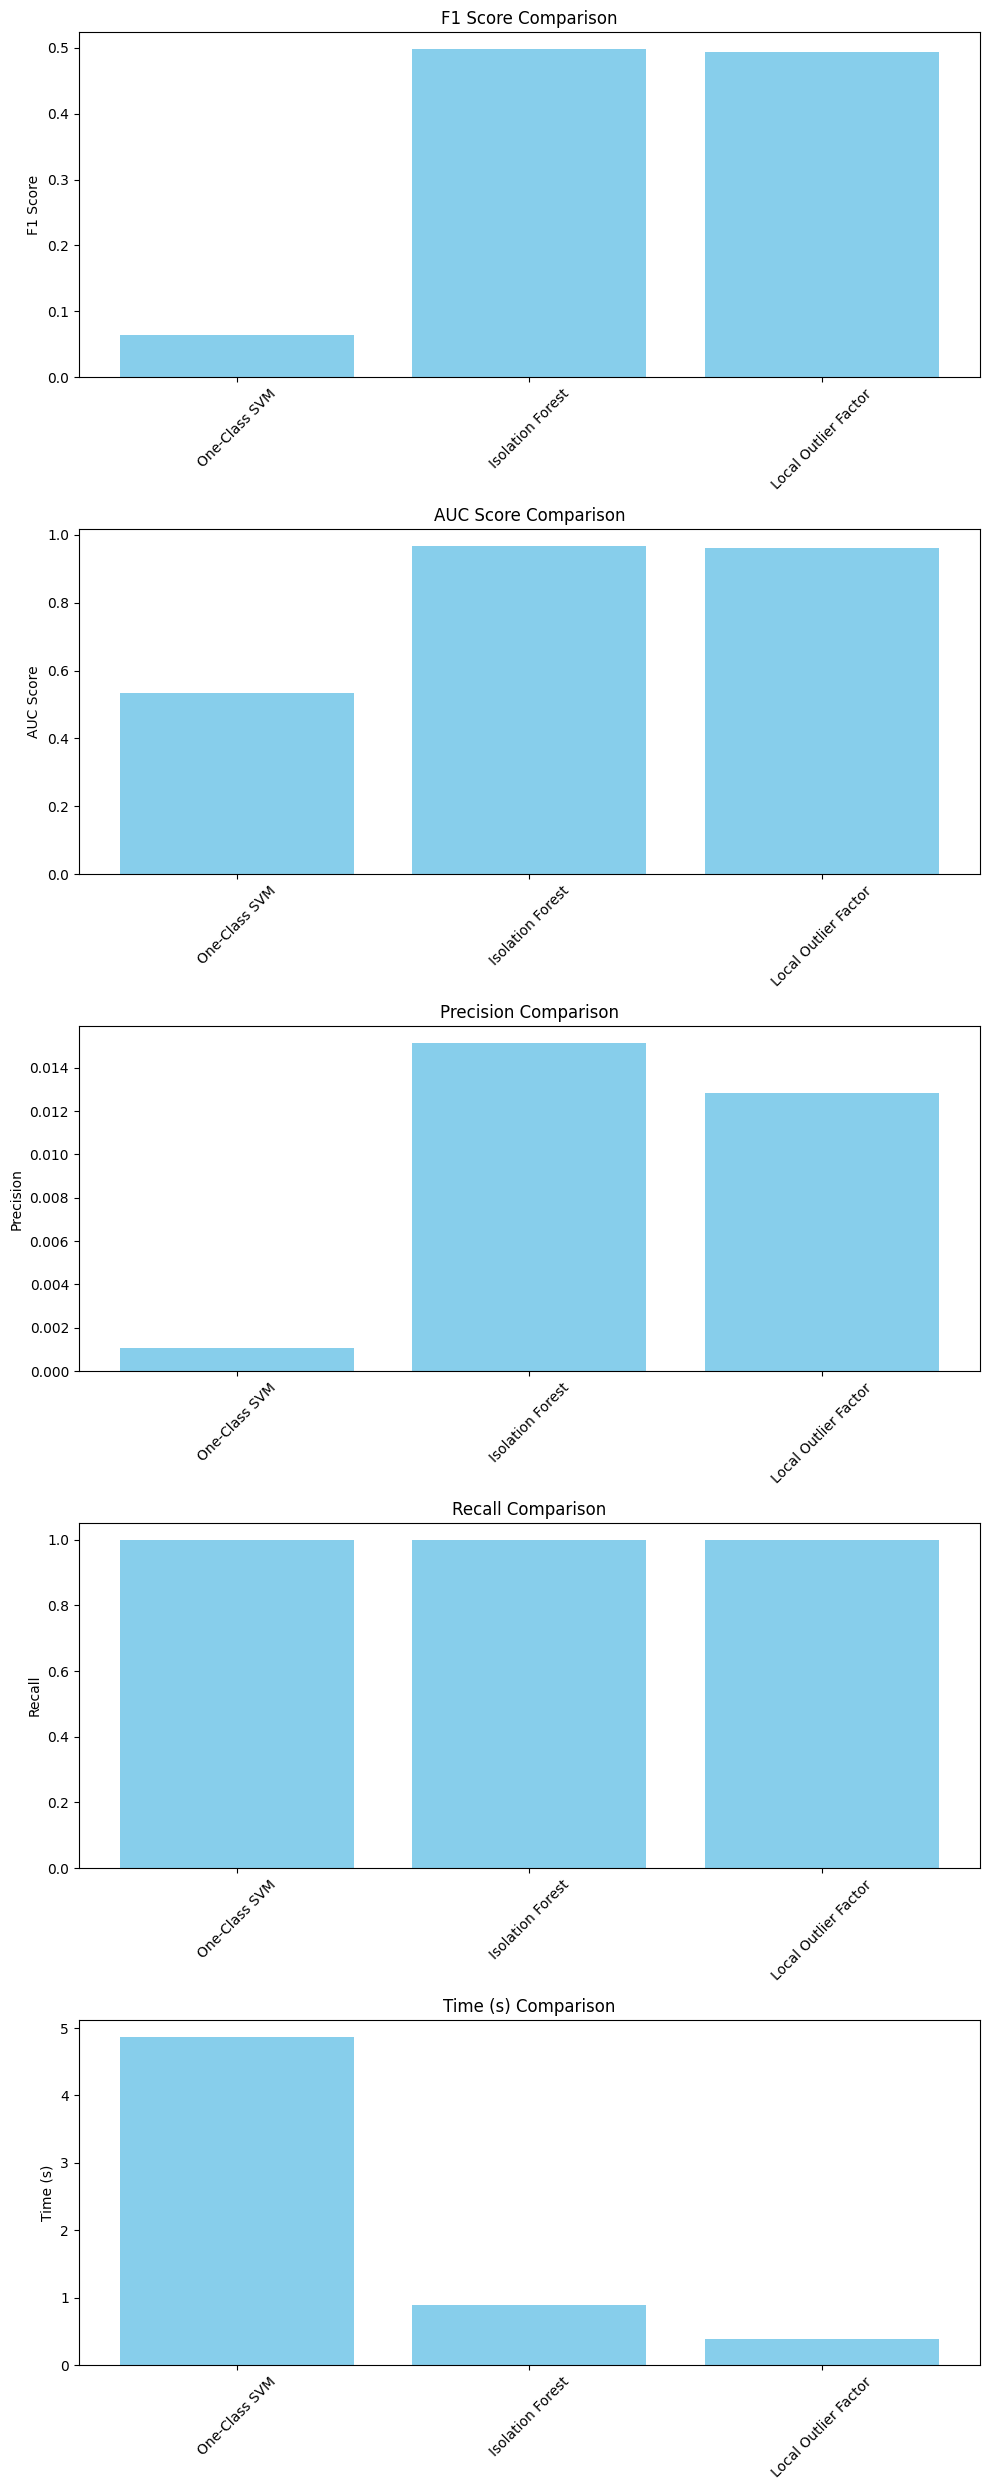

In [30]:
import time
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, precision_score, recall_score
from sklearn.model_selection import StratifiedShuffleSplit

# Stratified train-test split
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

# Define your models here (e.g., PCA, Isolation Forest, LOF, etc.)

# Example model setup
models = {
    "One-Class SVM": OneClassSVM(kernel='rbf', gamma='auto', nu=0.05),
    "Isolation Forest": IsolationForest(contamination=0.05, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, novelty=True, contamination=0.05),
    # Add more models here
}

# Store results for each model
results = {}

# Evaluate each model
for name, model in models.items():
    start_time = time.time()

    if name == "PCA":
        # PCA-specific implementation (if any)
        pass  # Add PCA handling code here

    else:
        model.fit(X_train)  # Fit on training data
        predictions = model.predict(X_test)

        if hasattr(model, 'predict'):
            predictions = model.predict(X_test)
        elif hasattr(model, 'fit_predict'):
            predictions = model.fit_predict(X_test)

    elapsed_time = time.time() - start_time

    # Compute scores
    f1 = f1_score(y_test, predictions == -1, average='macro') if predictions is not None else 0
    try:
        auc = roc_auc_score(y_test, predictions == -1) if predictions is not None else 0
    except ValueError:
        auc = np.nan  # Catch cases with only one class

    precision = precision_score(y_test, predictions == -1) if predictions is not None else 0
    recall = recall_score(y_test, predictions == -1) if predictions is not None else 0

    # Store results
    results[name] = (f1, auc, precision, recall, elapsed_time)

# Plotting results
fig, axes = plt.subplots(5, 1, figsize=(10, 25))
axes = axes.ravel()

metrics = ["F1 Score", "AUC Score", "Precision", "Recall", "Time (s)"]

for i, metric in enumerate(metrics):
    axes[i].bar(results.keys(), [result[i] for result in results.values()], color='skyblue')
    axes[i].set_title(f'{metric} Comparison')
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(results.keys(), rotation=45)

plt.tight_layout()
plt.show()
